In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/resources/student-mat.csv')

In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
test_1 = data[['sex','age','Dalc','Walc']]

In [5]:
test_1.head()

,sex,age,Dalc,Walc
0,F,18,1,1
1,F,17,1,1
2,F,15,2,3
3,F,15,1,1
4,F,16,1,2


In [6]:
test_1['sex'].unique()

array(['F', 'M'], dtype=object)

In [7]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

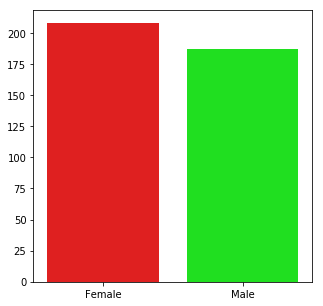

In [8]:
plt.figure(figsize=[5,5])

sb.barplot(['Female','Male'], [test_1['sex'].value_counts()[0], test_1['sex'].value_counts()[1]], palette = {'Female' : (1,0,0), 'Male':(0,1,0)})

plt.show()

In [9]:
age_male = test_1[test_1['sex'] == 'M'].age.value_counts()
age_female = test_1[test_1['sex'] == 'F'].age.value_counts()

print age_female
print "!!!!!!!!"
print age_male

17    58
16    54
18    43
15    38
19    14
20     1
Name: age, dtype: int64
!!!!!!!!
16    50
15    44
17    40
18    39
19    10
20     2
22     1
21     1
Name: age, dtype: int64


In [10]:
import numpy as np
print test_1['age'].value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64


In [11]:
female = test_1[test_1['sex']== 'F']
male = test_1[test_1['sex'] == 'M']

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5]),
 <a list of 16 Text yticklabel objects>)

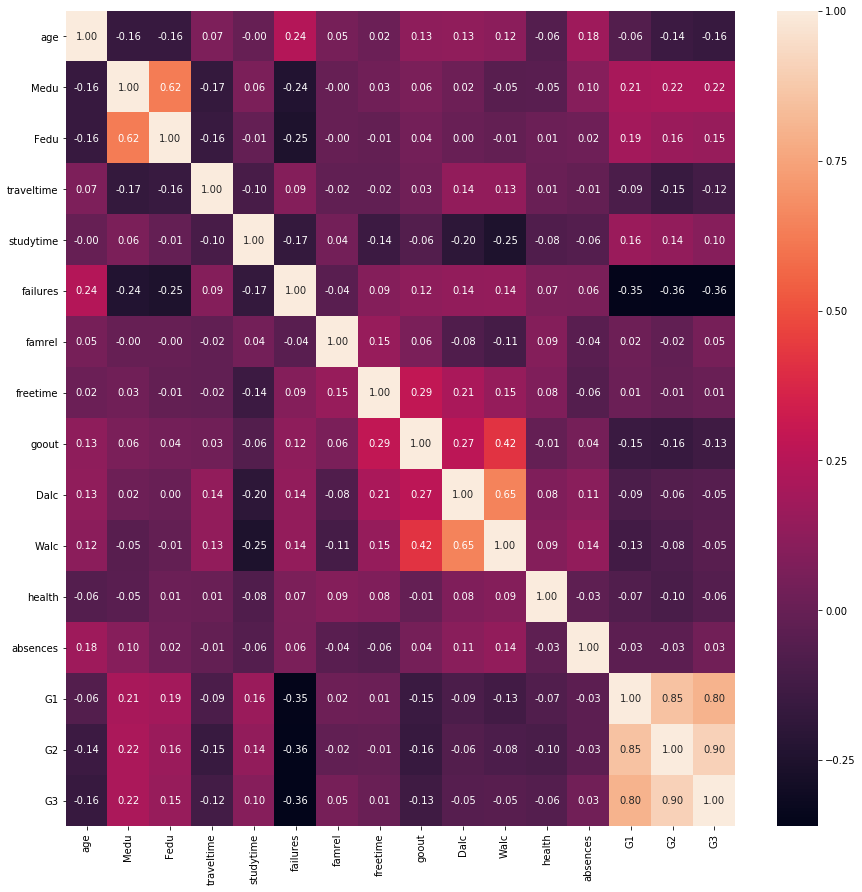

In [13]:
plt.figure(figsize=(15,15))
sb.heatmap(data.corr(),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

In [14]:
data['total_alc'] = data['Walc'] + data['Dalc']

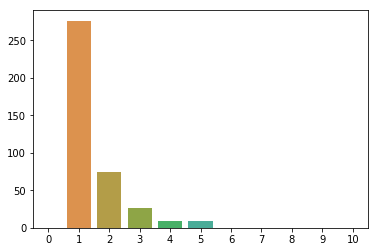

In [15]:
alc = []

for k in range(11):
    alc.append(len(data[data.Dalc == k]))
kd = sb.barplot(x = [0,1,2,3,4,5,6,7,8,9,10], y= alc)

plt.show()

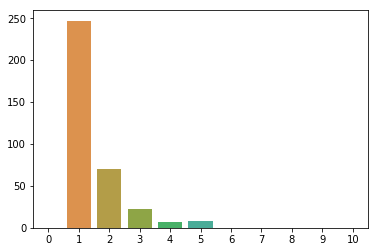

In [16]:
together = []
apart = []
for k in range(11):
    together_data = data[data['Pstatus'] == 'T']
    together.append(len(together_data[together_data.Dalc == k]))
    apart_data = data[data['Pstatus'] == 'A']
    apart.append(len(apart_data[apart_data.Dalc == k]))

kd = sb.barplot(x = [0,1,2,3,4,5,6,7,8,9,10], y = together )


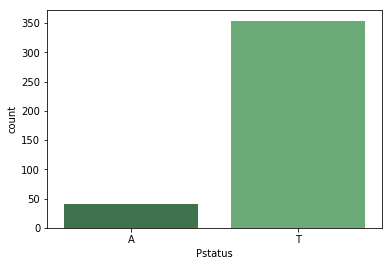

In [17]:
sb.countplot(x="Pstatus", data=data, palette="Greens_d");

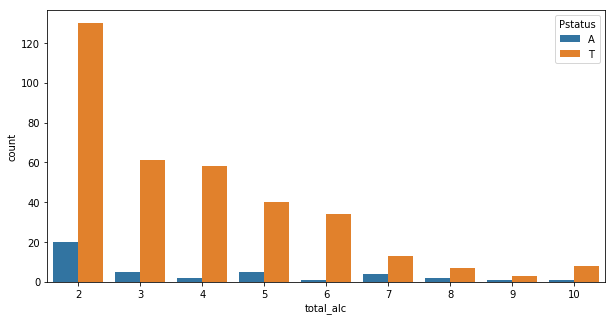

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
sb.countplot(x = "total_alc", hue = "Pstatus", data = data)

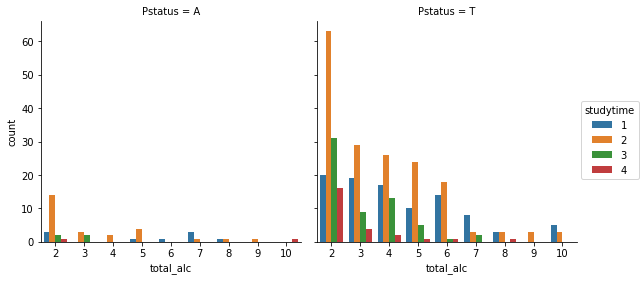

In [19]:
sb.factorplot(x="total_alc", hue="studytime", col="Pstatus", data=data, kind="count")

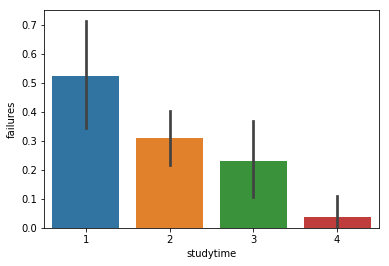

In [20]:
sb.barplot(x="studytime", y="failures", data=data)

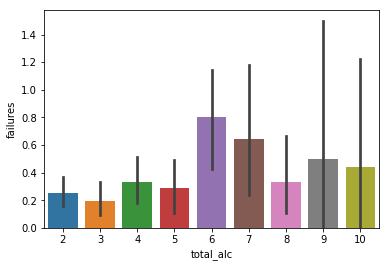

In [21]:
sb.barplot(x="total_alc", y="failures", data=data)

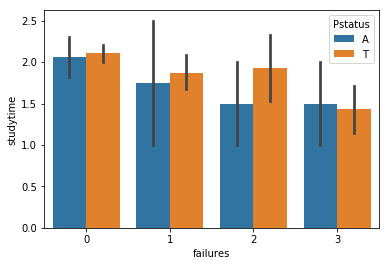

In [22]:
sb.barplot(x="failures", y="studytime", hue = "Pstatus", data=data)

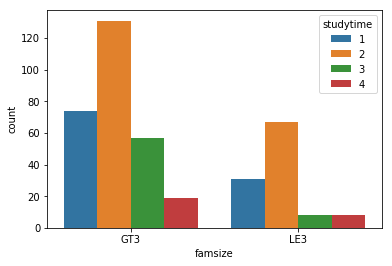

In [23]:
sb.countplot(x = "famsize", hue = "studytime", data = data)

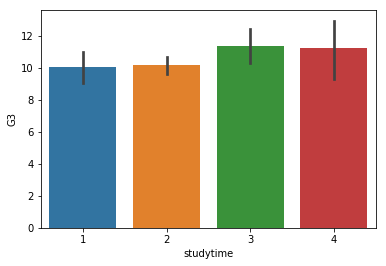

In [29]:
sb.barplot(x = "studytime", y= "G3", data = data)

In [30]:
data['total_grad'] = data['G1']+ data['G2'] + data['G3']

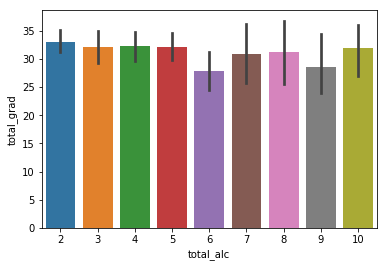

In [31]:
sb.barplot(x = 'total_alc', y= 'total_grad', data=data)